In [ ]:

!pip install ipyplot

Saving F0.png to F0.png
Saving F6.png to F6.png
Saving F12.png to F12.png


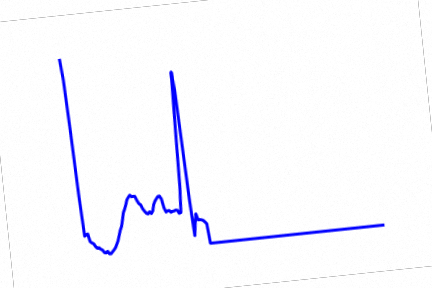

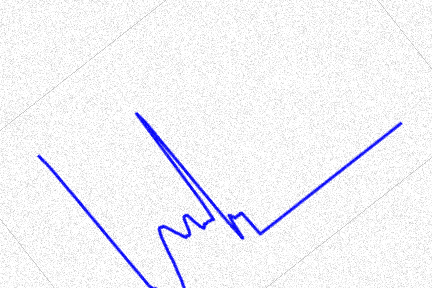

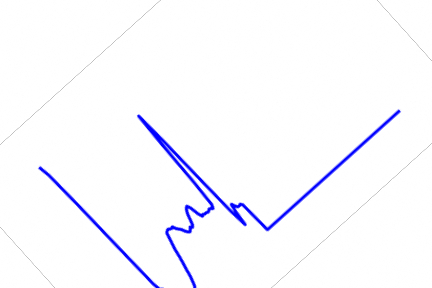

In [ ]:
from PIL import Image
from google.colab import files
import io
import numpy as np
import csv
import imgaug.augmenters as iaa
import random
import ipyplot
import imageio


# Defining augmentation sequence to rotate image in between -90 and +90 and adding Gaussian Noise
augmentation = iaa.Sequential([
    iaa.Affine(rotate=(-90, 90)),
    iaa.AdditiveGaussianNoise(scale=(0, 0.1 * 255)),
])

image_data = []
output_file = 'path_to_output_file.csv'

# Uploading files to Google Colab
uploaded = files.upload()

for file_name, file_content in uploaded.items():
    # Reading the file content
    file_bytes = io.BytesIO(file_content)

    # Processing the file content

    image = Image.open(file_bytes)

    # Converting the image to a NumPy array
    image_array = np.array(image)

    # Applying augmentation to the image
    augmented_image = augmentation(image=image_array)

    # Converting the augmented image back to PIL image
    augmented_pil_image = Image.fromarray(augmented_image)

    # Displaying the augmented image
    #augmented_pil_image.show()

    # Converting the augmented image to grayscale
    grayscale_image = augmented_pil_image.convert('L')
    grayscale_image = grayscale_image.resize((50, 50))

    # Converting the grayscale image to a NumPy array
    grayscale_array = np.array(grayscale_image)

    pixel_values = np.array(grayscale_array).flatten()

    # Appending the pixel values to the image data list
    image_data.append(pixel_values)

# Writing the image data to the output CSV file
with open(output_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(image_data)
